In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import AdvancedBraggEdgeFitting_v2
from PIL import Image

import tifffile
from tifffile import TiffFile

from skimage import io

import os, fnmatch
from os import listdir

from TOF_routines import tof2l
from TOF_routines import find_nearest

from astropy.io import fits
%matplotlib notebook

In [2]:
pathdata = '/media/carminati_c/Data2/LSP_Manuel/sample_binned_spotCleaned/'
pathob = '/media/carminati_c/Data2/LSP_Manuel/OB_binned_spotCleaned/'
files_sample = (sorted(fnmatch.filter(listdir(pathdata),'*.tif')))
files_ob = (sorted(fnmatch.filter(listdir(pathob),'*.tif')))
spectrum = np.loadtxt('/media/ws_niag/10_people/Morgano/RADEN_data_analysis/TEST6_000_Spectra.txt', usecols=0)

In [56]:
spectrum_binned = spectrum[0::18]
print(len(spectrum_binned))

t0=-0.0002618673892937752 
# L=18.961609065251505
L = 18.5
mylambda_bin = tof2l(spectrum_binned, 0,t0,L)

156


In [57]:
(pathob+files_ob[0])

ob = io.imread(pathob+files_ob[0])
np.shape(ob)

ob_image = np.zeros([300,400,155])
sample_image = np.zeros([300,400,155])
np.shape(ob_image)

for i in range(0,155):
    ob_image[:,:,i] = io.imread(pathob+files_ob[i])
    sample_image[:,:,i] = io.imread(pathdata+files_sample[i])

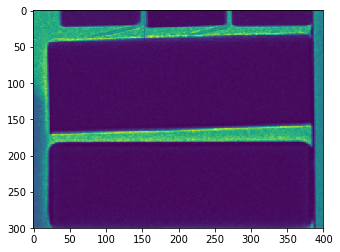

In [58]:
plt.figure()
plt.imshow(sample_image[:,:,i]/ob_image[:,:,i])

trans_image = np.zeros([300,400,155])
for i in range(0,155):
    dose = np.median(ob_image[10:20,10:20,i])/np.median(sample_image[10:20,10:20,i])
    trans_image[:,:,i] = sample_image[:,:,i]/ob_image[:,:,i]*dose

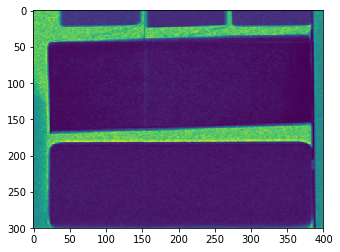

In [52]:
plt.figure()
plt.imshow(trans_image[:,:,70])

In [53]:
sp=np.zeros(156)
for i in range(0,155):
    sp[i] = np.median(trans_image[37,254,i])

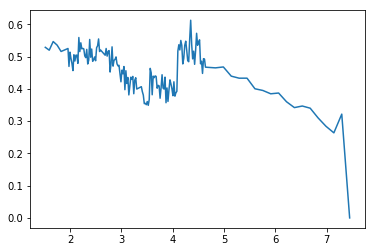

In [54]:
plt.figure()
plt.plot(mylambda_bin, sp)

[84, 119]
101
[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 24
    # data points      = 35
    # variables        = 7
    chi-square         = 0.01643777
    reduced chi-square = 5.8706e-04
    Akaike info crit   = -254.223259
    Bayesian info crit = -243.335823
[[Variables]]
    t0:                 4.19139887 (init = 4.091336)
    alpha:              7.6332e-04 (init = 0.06473948)
    sigma:              0.00645208 (init = 0.12177)
    a1:                 0.23423079 (init = 3.872462)
    a2:                 0.09581549 (init = -0.7569997)
    a5:                -0.17366584 (init = -5.332194)
    a6:                 0.11763089 (init = 1.369496)
    bool_transmission: -inf (fixed)

None
bool value, Boolean for whether error bars were estimated by fit. False
None


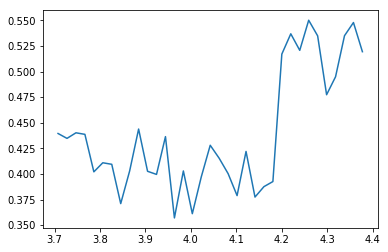

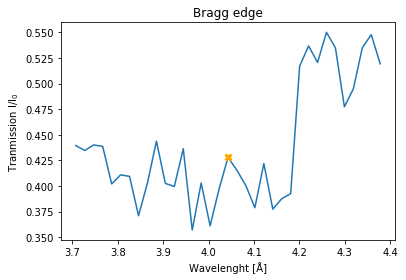

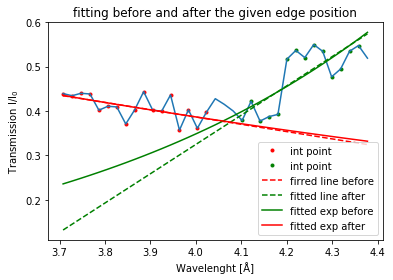

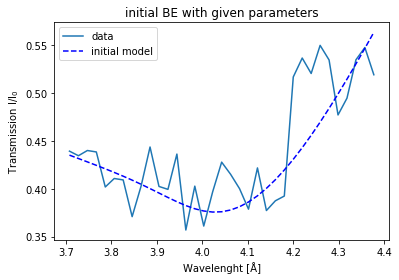

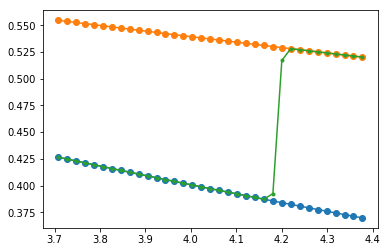

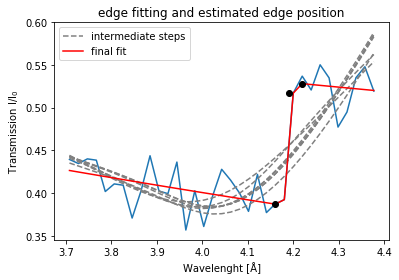

CPU times: user 961 ms, sys: 8.08 ms, total: 969 ms
Wall time: 963 ms


In [59]:
%%time
myrange =[]
myrange.append(find_nearest(mylambda_bin, 3.7))
myrange.append(find_nearest(mylambda_bin, 4.4))
print(myrange)

plt.figure()
plt.plot(mylambda_bin[myrange[0]:myrange[1]], sp[myrange[0]:myrange[1]])

est_sigma = 0.1
est_alpha = 0.1
est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
ris = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, True, False, False, True)
# t_edg = ris['t0']
# print(t_edg)

86740


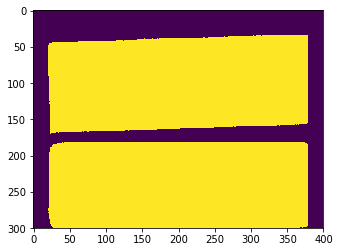

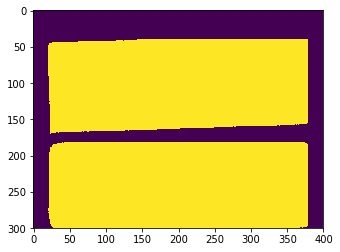

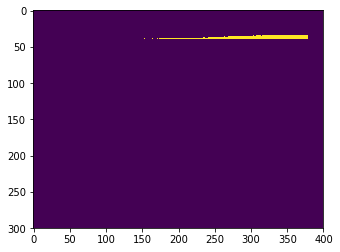

In [10]:
mymask = trans_image[:,:,70]<0.5

mymask[:28,:] = False
mymask[:,380:] = False

plt.figure()
plt.imshow(mymask)
print(np.sum(mymask))

othermask = trans_image[:,:,70]<0.5
othermask[:40,:] = False
othermask[:,380:] = False
plt.figure()
plt.imshow(othermask)

# plt.figure()
# plt.imshow(othermask!=mymask)

little_mask = othermask!=mymask
plt.figure()
plt.imshow(little_mask)

18
[ 0 36]
37 2 37


/home/carminati_c/anaconda3/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:501: RuntimeWarning: invalid value encountered in less
  mask = (g < 0) & np.isfinite(ub)
/home/carminati_c/anaconda3/lib/python3.7/site-packages/scipy/optimize/_lsq/common.py:505: RuntimeWarning: invalid value encountered in greater
  mask = (g > 0) & np.isfinite(lb)
/home/carminati_c/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: array must not contain infs or NaNs

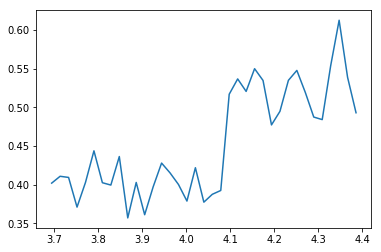

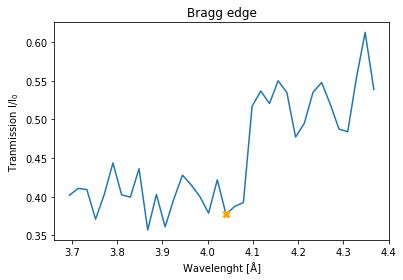

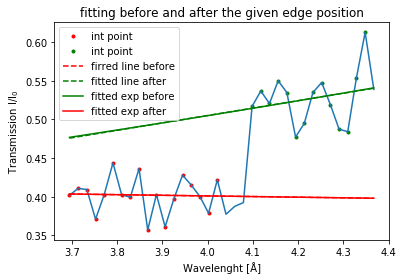

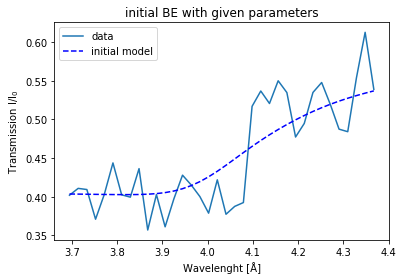

In [11]:
%%time

est_sigma = 0.08
est_alpha = 0.08
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)
print(est_pos)
small_range = np.array([0, myrange[1]-myrange[0]-1])
small_lambda = mylambda_bin[myrange[0]:myrange[1]]
print(small_range)
print(len(small_lambda), len(small_range), len(sp[myrange[0]:myrange[1]]))

plt.figure()
plt.plot(small_lambda,sp[myrange[0]:myrange[1]] )

AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp[myrange[0]:myrange[1]], small_range, small_lambda, est_pos, est_sigma, est_alpha, True, False, False, True)

est_pos = find_nearest(mylambda_bin, 4.05)
print(est_pos)
print(myrange)
AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(sp, myrange, mylambda_bin, est_pos, est_sigma, est_alpha, True, False, False, True)


edge_position = np.zeros(np.shape(mymask))
edge_width = np.zeros(np.shape(mymask))



# print(np.shape(edge_position))

# for i in range(0, np.shape(mymask)[0]):
    
#     for j in range(0, np.shape(mymask)[1]):
        
#         if (mymask[i,j]):
# #             print(i,j,' ciao')
#             # extract the signal
#             mysignal = np.zeros(myrange[1]-myrange[0])
            
    
#             for ind in range(myrange[0],myrange[1]):
#                 mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
#             try:
#                 edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

#                 edge_position[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
#             except:
#                 print("Unexpected error at :", i, j)
#                 edge_position[i,j]= -2.0
#                 edge_width[i,j]=-2.0
                

                    


    

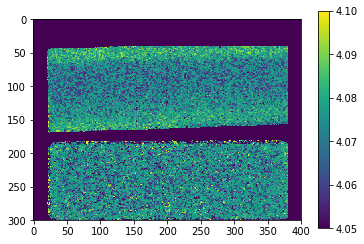

In [12]:

test = np.load('edge_position.npy')
plt.figure()
plt.imshow(test,vmin=4.05, vmax=4.10)
plt.colorbar()

In [14]:
test_little = np.load('edge_position_little.npy')
fits.writeto('edge_pos.fits',test)


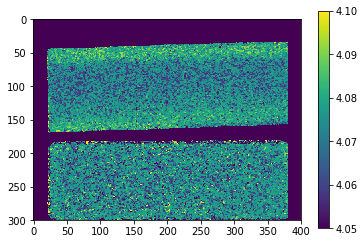

In [15]:
plt.figure()
plt.imshow(test_little+test,vmin=4.05, vmax=4.10)
plt.colorbar()

np.save("edge_position_tot.npy", test_little+test)

In [16]:
EP = np.load("edge_position_tot.npy")

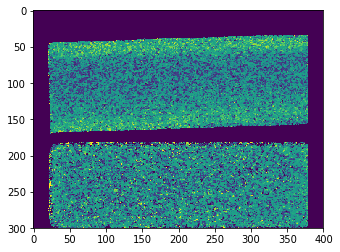

In [17]:
plt.figure()
plt.imshow(EP,vmin=4.05, vmax=4.10)

In [18]:
sum(sum(n < 0 for n in EP))

46

In [19]:
#     t0:                 4.07855978 +/- 15750.9720 (386189.56%) (init = 4.076283)
#     alpha:              8.8506e-04 +/- 26892.9752 (3038556174.03%) (init = 0.007669497)
#     sigma:              2.0660e-04 +/- 62396.2248 (30201102063.85%) (init = 0.0001408172)
#     a1:                 1.94456283 +/- 1.28224664 (65.94%) (init = 0.9776328)
#     a2:                -0.03410872 +/- 0.30144455 (883.78%) (init = 0.1905023)
#     a5:                -4.32338756 +/- 1.99813278 (46.22%) (init = -3.757007)
#     a6:                 1.29564172 +/- 0.49946988 (38.55%) (init = 1.176675)
        
est_alpha = 0.1
est_sigma = 0.1
a1 = 1.94456283
a2 = -0.03410872
a5 = -4.32338756
a6 = 1.29564172
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.07)

missing_edges = np.zeros(np.shape(mymask))
print(est_pos)

print(myrange)
print(small_range)

# 37,254

# for ind in range(myrange[0],myrange[1]):
#     mysignal[ind-myrange[0]] = np.median(trans_image[37,254,ind])

# plt.figure()
# plt.plot(small_lambda, mysignal)

# edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, True, False, False, True)

for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (EP[i,j]==-2):
            print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                missing_edges[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                missing_edges[i,j]= -2.0
#                 edge_width[i,j]=-2.0
                

20
[88, 125]
[ 0 36]
37 254  ciao
43 219  ciao


/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:767: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/carminati_c/anaconda3/lib/python3.7/site-packages/lmfit/minimizer.py:774: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


47 205  ciao
53 187  ciao
53 339  ciao
56 240  ciao
66 136  ciao
76 79  ciao
82 359  ciao
88 21  ciao
89 357  ciao
90 138  ciao
101 299  ciao
106 199  ciao
117 117  ciao
125 193  ciao
153 342  ciao
154 84  ciao
161 182  ciao
163 188  ciao
163 189  ciao
164 89  ciao
181 265  ciao
Unexpected error at : 181 265
181 320  ciao
182 225  ciao
182 251  ciao
213 294  ciao
216 140  ciao
217 91  ciao
217 135  ciao
222 35  ciao
223 68  ciao
224 32  ciao
238 23  ciao
244 228  ciao
Unexpected error at : 244 228
246 336  ciao
250 154  ciao
250 255  ciao
261 222  ciao
262 257  ciao
263 88  ciao
264 67  ciao
284 215  ciao
287 361  ciao
291 247  ciao
298 371  ciao


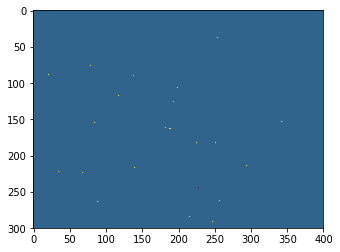

In [20]:
plt.figure()
plt.imshow(missing_edges)

In [21]:
est_alpha = 0.09
est_sigma = 0.09
a1 = 1.94456283
a2 = -0.03410872
a5 = -4.32338756
a6 = 1.29564172
est_pos = find_nearest(mylambda_bin[myrange[0]:myrange[1]], 4.05)

# missing_edges = np.zeros(np.shape(mymask))
print(est_pos)

print(myrange)
print(small_range)



for i in range(0, np.shape(mymask)[0]):
    
    for j in range(0, np.shape(mymask)[1]):
        
        if (missing_edges[i,j]==-2):
            print(i,j,' ciao')
            # extract the signal
            mysignal = np.zeros(myrange[1]-myrange[0])
            
    
            for ind in range(myrange[0],myrange[1]):
                mysignal[ind-myrange[0]] = np.median(trans_image[i,j,ind])
            
            try:
                edge_fit = AdvancedBraggEdgeFitting_v2.AdvancedBraggEdgeFitting(mysignal, small_range, small_lambda, est_pos, est_sigma, est_alpha, False, False, False, True)

                missing_edges[i,j] = edge_fit['t0']
#                 if (len(edge_fit['pos_extrema'])==2):
#                     edge_width[i,j] = small_lambda[edge_fit['pos_extrema'][1]]-small_lambda[edge_fit['pos_extrema'][0]]
#                 else:
#                     edge_width[i,j]=-2.0
            except:
                print("Unexpected error at :", i, j)
                missing_edges[i,j]= -2.0
#                 edge_width[i,j]=-2.0

18
[88, 125]
[ 0 36]
181 265  ciao
244 228  ciao


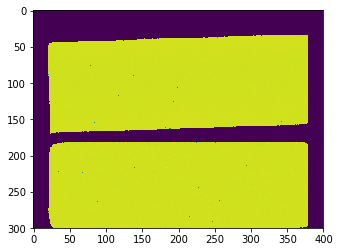

In [22]:
plt.figure()
plt.imshow(missing_edges+EP)

In [23]:
updated_EP = np.zeros(np.shape(mymask))

for i in range(0, np.shape(mymask)[0]):
    for j in range(0, np.shape(mymask)[1]):
        if (EP[i,j]!=-2):
            updated_EP[i,j]= EP[i,j]
        else:
            updated_EP[i,j]= missing_edges[i,j]
# updated_EP = EP[EP!=-2]
# updated_EP = missing_edges[EP==-2]

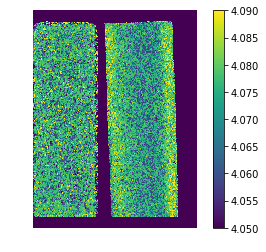

In [63]:
plt.figure()
plt.imshow(np.rot90(updated_EP,3),vmin=4.05, vmax=4.09)
plt.axis('off')
plt.colorbar()
plt.savefig('LSP_manuel_model.pdf')

In [ ]:
np.save('edge_positions_all.npy', updated_EP)

In [ ]:
fits.writeto('edge_pos_all.fits',updated_EP)